# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action='ignore')

import pickle

### 2. Load the dataset

In [2]:
df = pd.read_csv('car+data.csv')
df.sample(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
191,Bajaj Discover 125,2012,0.20,0.57,25000,Petrol,Individual,Manual,1
148,Bajaj Pulsar 220 F,2010,0.52,0.94,45000,Petrol,Individual,Manual,0
65,etios liva,2014,4.75,6.95,45000,Diesel,Dealer,Manual,0
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
242,xcent,2014,4.40,7.13,34000,Petrol,Dealer,Manual,0
94,corolla altis,2008,4.00,22.78,89000,Petrol,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
12,ciaz,2015,7.50,9.94,15000,Petrol,Dealer,Automatic,0


### 3. Check the shape and basic information of the dataset.

In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [6]:
df.describe(include='O').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [7]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(299, 9)

### 5. Drop the columns which you think redundant for the analysis.

In [10]:
df.drop(columns=['Car_Name'],axis = 1, inplace = True)

In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [12]:
current_year = 2023

df['Age_of_the_Car'] = current_year - df['Year']

In [13]:
df.drop(columns=['Year'],axis = 1, inplace = True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### 7. Encode the categorical columns

In [15]:
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
labenc = LabelEncoder()

for i in categorical_columns:
    df[i] = df[[i]].apply(labenc.fit_transform)

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_Car
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


### 8. Separate the target and independent features.

In [17]:
X = df.drop('Selling_Price', axis = 1)
Y = df['Selling_Price']

In [18]:
X.head(5)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_the_Car
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6
3,4.15,5200,2,0,1,0,12
4,6.87,42450,1,0,1,0,9


### 9. Split the data into train and test.

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(209, 7) (90, 7)
(209,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [20]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
Y_train_pred = rf_model.predict(X_train)
train_r2 = r2_score(Y_train, Y_train_pred)
print(f'R2_Score (train): {train_r2}')

R2_Score (train): 0.9829806869249152


In [22]:
Y_test_pred = rf_model.predict(X_test)
test_r2 = r2_score(Y_test, Y_test_pred)
print(f'R2_Score (test): {test_r2}')

R2_Score (test): 0.37129685127797096


### 11. Create a pickle file with an extension as .pkl

In [24]:
pickle.dump(rf_model, open('predict_model.pkl', 'wb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="../static/style.css">
    <title>Lab 5 Solution</title>

</head>
<body>
    <header><h1>Car Price Predictor</h1></header>
    <div>
        <h3>{{ prediction_text }}</h3>
    </div>
    <div>
        <form method="POST" action="{{ url_for('predict')}}" >
            <table>
                <tr>
                    <td><p>Age of the car(In Years)</p></td>
                    <td><input placeholder="Age of the car" type="text" name="age_of_the_car" required="required"></td>
                </tr>
                <tr>
                    <td><p>Present price of car(In Lakhs)</p></td>
                    <td><input placeholder="Present price of car" type="text" name="Present_Price" required="required"></td>
                </tr>
                <tr>
                    <td><p>Kms Driven</p></td>
                    <td><input placeholder="Kms Driven" type="text" name="Kms_Driven" required="required"></td>
                </tr>
                <tr>
                    <td><p>Fuel Type</p></td>
                    <td><select name="Fuel_Type" id="fuel" required="required">
                            <option value="0">Petrol</option>
                            <option value="1">Diesel</option>
                        </select>
                    </td>
                </tr>
                <tr>
                    <td><p>Seller Type</p></td>
                    <td><select name="Seller_Type" id="seller" required="required">
                            <option value="0">Dealer</option>
                            <option value="1">Individual</option>
                        </select>
                    </td>
                </tr>
                <tr>
                    <td><p>Transmission Type</p></td>
                    <td><select name="Transmission" id="transmission" required="required">
                            <option value="0">Manual car</option>
                            <option value="1">Automatic car</option>
                        </select>
                    </td>
                </tr>
                <tr>
                    <td><p>Previous Owner count</p></td>
                    <td><input placeholder="Previous Owner count" type="text" name="Owner" required="required"></td>
                </tr>
            </table>

            <p><input class="submit" type="submit" value="Predict Selling Price"></p>
        </form>
    </div>
</body>
</html>

### b) Create app.py file and write the predict function

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
# open and load the pickle file provided in read mode.
model = pickle.load(open('predict_model.pkl', 'rb'))


@app.route('/', methods=['GET'])
def home():
    return render_template('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        age_of_the_car = request.form['age_of_the_car']
        Present_Price = float(request.form['Present_Price'])
        Kms_Driven = int(request.form['Kms_Driven'])
        Fuel_Type = request.form['Fuel_Type']
        Seller_Type = request.form['Seller_Type']
        Transmission = request.form['Transmission']
        Owner = request.form['Owner']

        prediction = model.predict(
            [[age_of_the_car, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]])
        output = round(prediction[0], 2)
        return render_template('index.html', prediction_text='You can sell your car at {} lakhs'.format(output))


if __name__ == "__main__":
    app.run(debug=True)
    app.config['TEMPLATES_AUTO_RELOAD'] = True


### URL of the Prediction.

Running on http://127.0.0.1:5000/

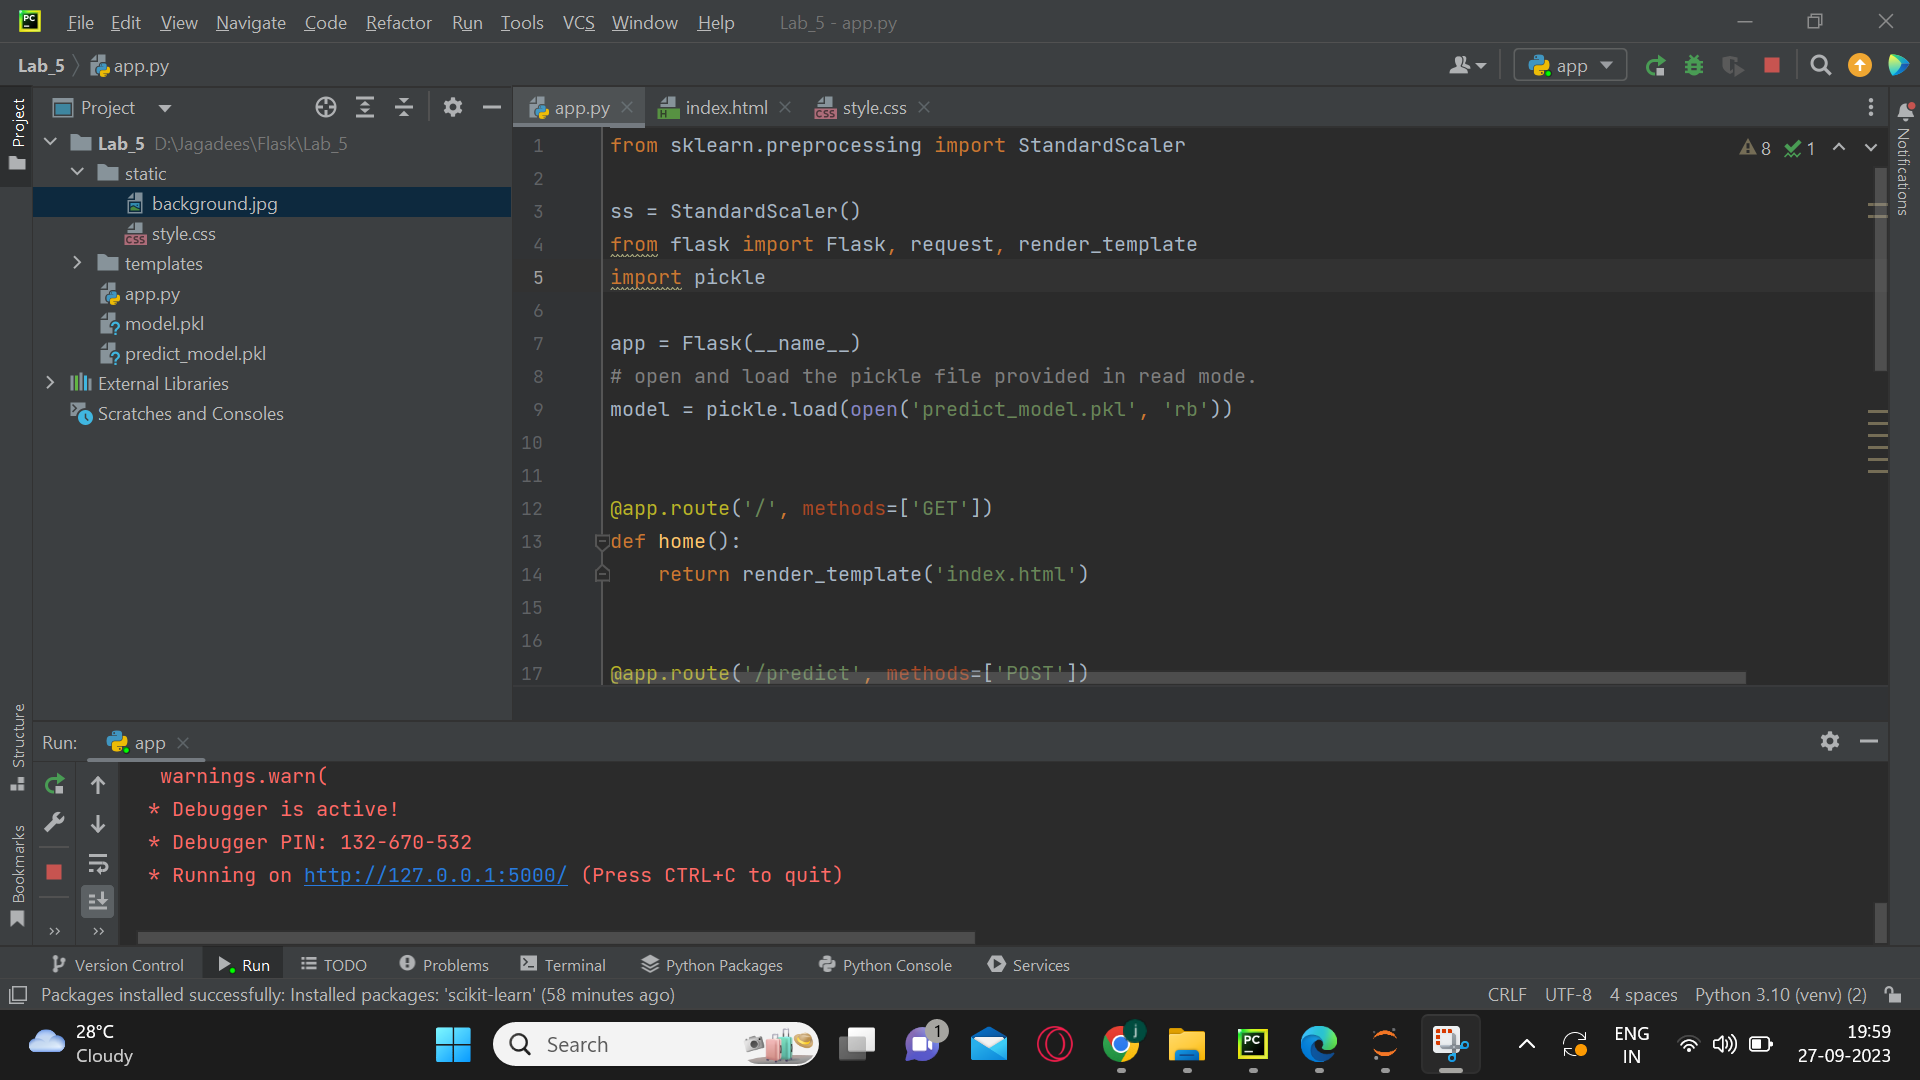

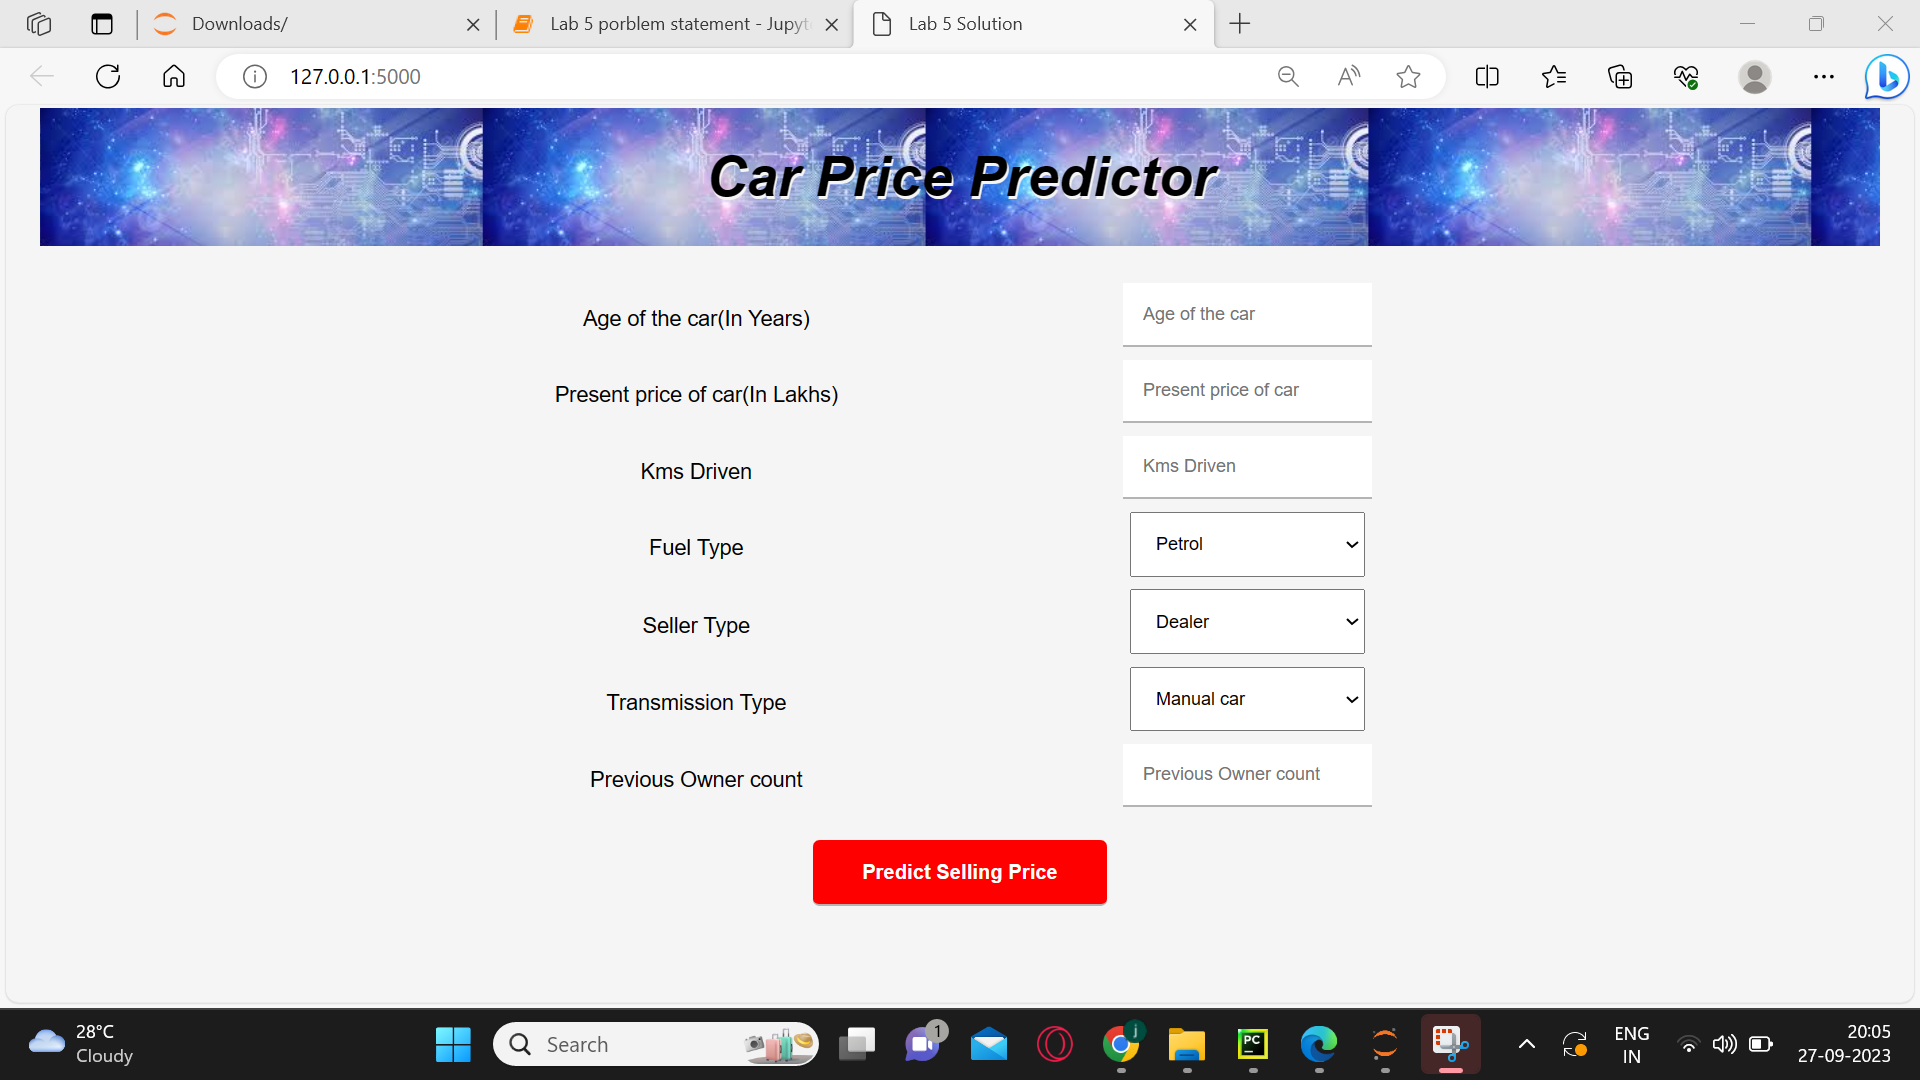

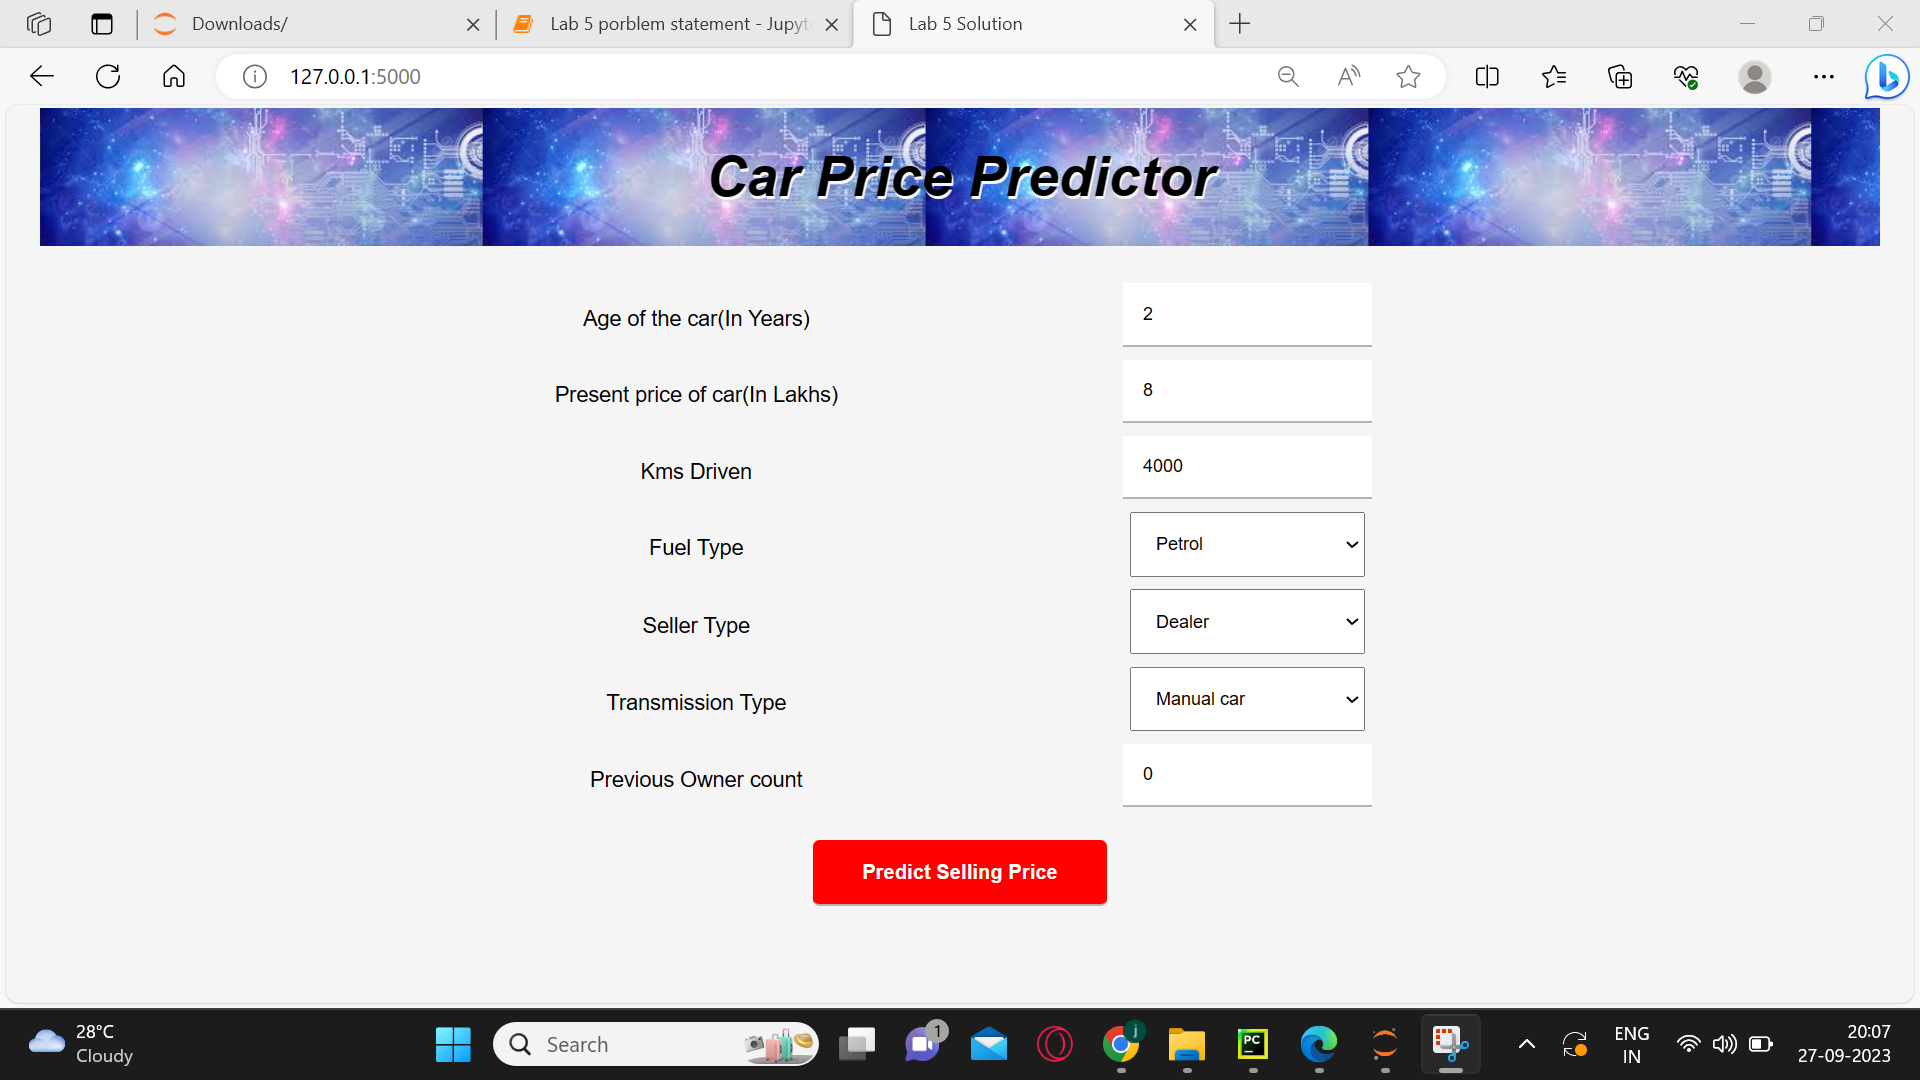

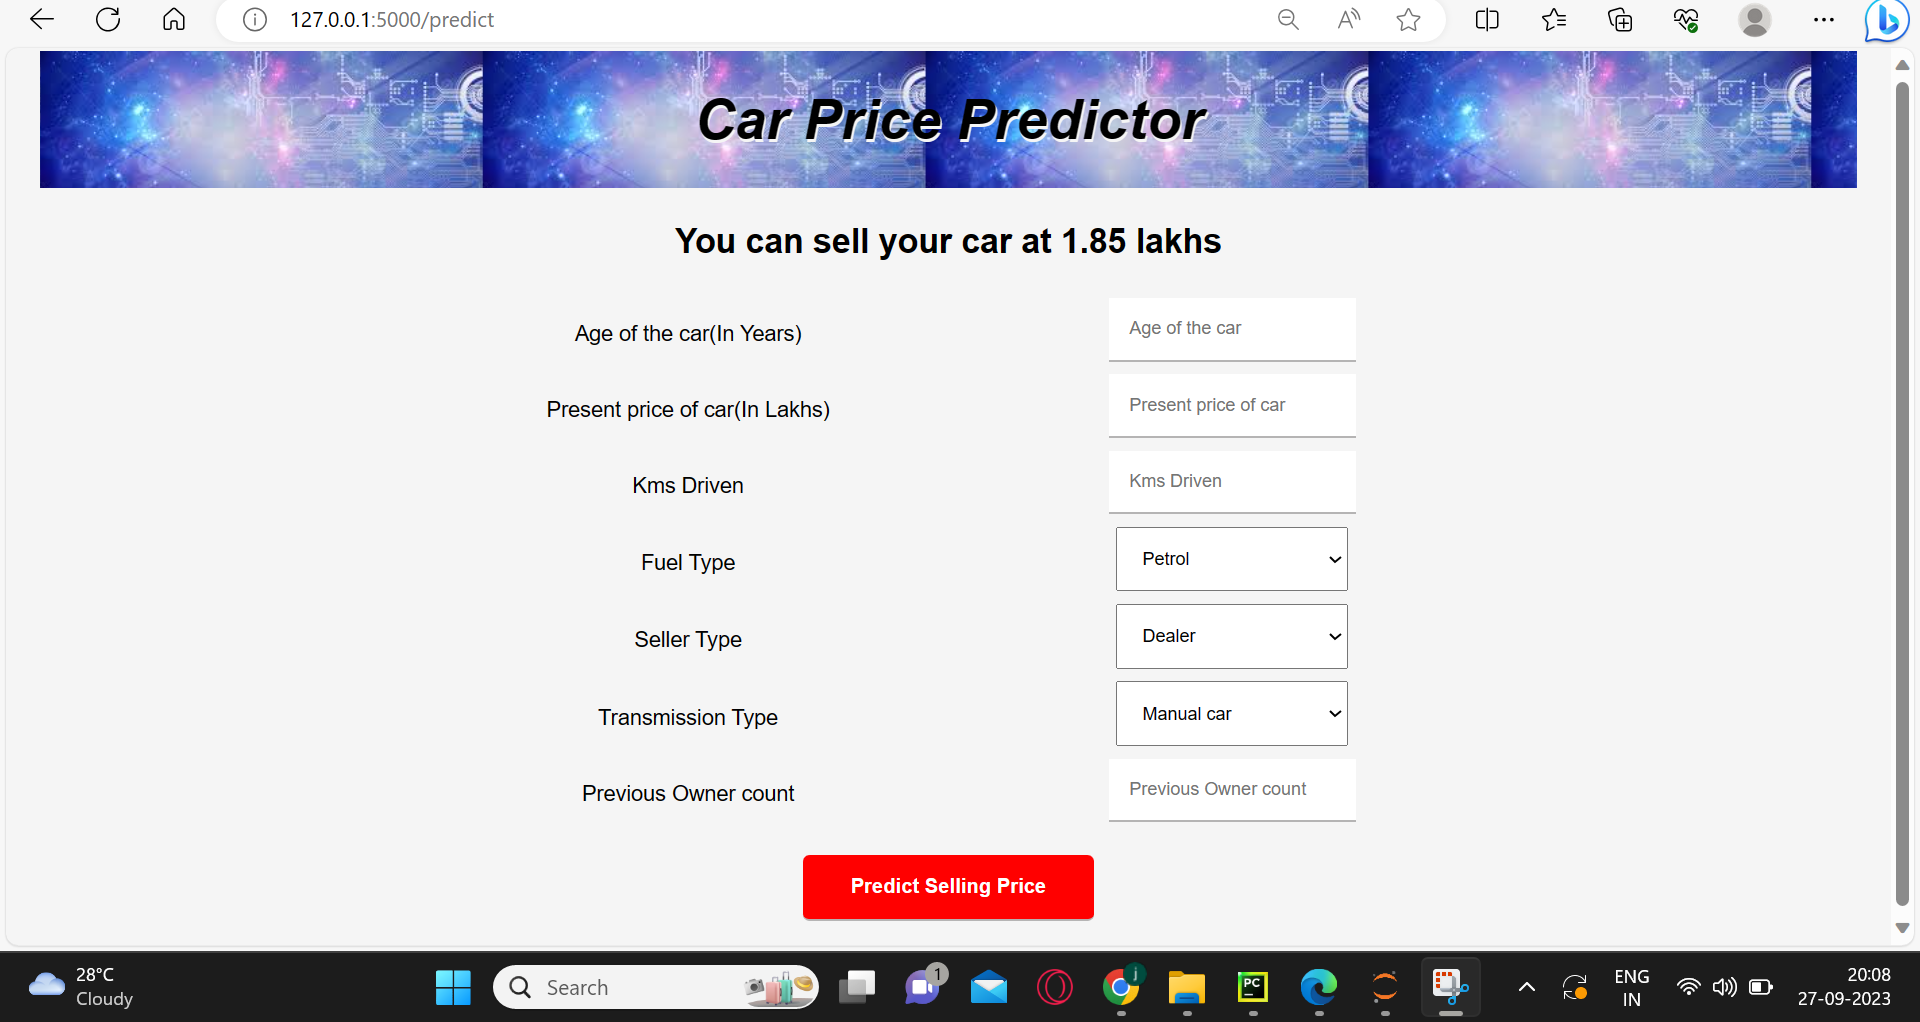

### Happy Learning :)